# Wednesday, October 22nd, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## [Project 4 - Image denoising](https://jllottes.github.io/Projects/image_denoising/image_denoising.html) (continued)

Last class, we discussed adding salt and pepper noise to a grayscale image. This culiminated in the following exercise:

**Exercise.** Use the sample code from last class to write a function `sp_noise(img, noise)` that adds salt and pepper noise to an image. Its first argument `img` should be a 2-dimensional numpy array representing the image and the second argument `noise` should be the fraction of pixels that are to be replaced by noise (for example, with `noise = 0.05` about 5% of pixels should be noise, consisting in roughly equal parts of white and black pixels). The function should return a 2-dimensional numpy array representing the original image with noise added.

For now, we can use the pre-noised image that we downloaded last class. The pre-noised image has noise added to the `face.png` file shared on the project page. We can download that image as well to compare the two.

Alternatively, you can select any clean image you would like and use the `sp_noise` function to produce a noisy version.

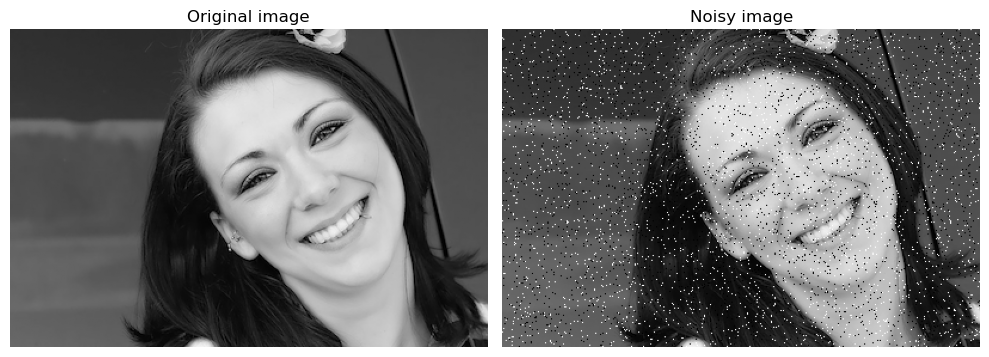

In [17]:
img = np.mean(plt.imread('face.png')[:,:,:3], axis=2)
noisy_img = np.mean(plt.imread('noisy_img.png')[:,:,:3], axis=2)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=1)
plt.title('Noisy image')
plt.axis('off')

plt.tight_layout()

### The mean and median filters

A description of the mean filter is provided on the [project page](https://jllottes.github.io/Projects/image_denoising/image_denoising.html). Let's try to apply the mean filter.

- For right now, we will use a `3` by `3` grid centered centered at each pixel to compute the mean.
- For right now, we will ignore all pixels at the edges of the image.

Again, let's make a copy `filtered_img` of the noisy array that we will filter so that we do not modify the noisy array.

In [8]:
filtered_img = noisy_img.copy()

If we are considering the pixel in the `i`th row and `j`th column (i.e. `noisy_img[i,j]`, we want a `3` by `3` slice centered on the `[i,j]`th pixel. That is, we want a slice that includes the `i-1`, `i`, and `i+1` rows and the `j-1`, `j`, and `j+1` columns.

In [9]:
i = 20
j = 40

grid = noisy_img[i-1:i+2, j-1:j+2]

In [10]:
print(grid.shape)

(3, 3)


In [24]:
num_rows, num_cols = noisy_img.shape
mean_filtered_img = noisy_img.copy()

for i in range(1, num_rows-1):            # For now, let's skip the first and last rows
    for j in range(1, num_cols-1):        # and skip the first and last columns
        grid = noisy_img[i-1:i+2, j-1:j+2]
        mean = np.mean(grid)
        mean_filtered_img[i,j] = mean

Text(0.5, 1.0, 'Mean filtered image')

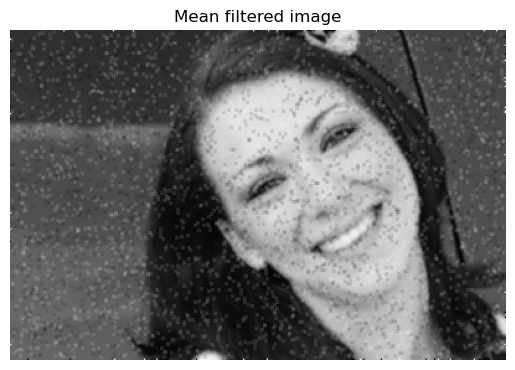

In [25]:
plt.imshow(mean_filtered_img, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Mean filtered image')

What about the median filter? The `np.median` function will compute the median of an array.

In [26]:
num_rows, num_cols = noisy_img.shape
median_filtered_img = noisy_img.copy()

for i in range(1, num_rows-1):            # For now, let's skip the first and last rows
    for j in range(1, num_cols-1):        # and skip the first and last columns
        grid = noisy_img[i-1:i+2, j-1:j+2]
        median = np.median(grid)
        median_filtered_img[i,j] = median

(np.float64(-0.5), np.float64(399.5), np.float64(265.5), np.float64(-0.5))

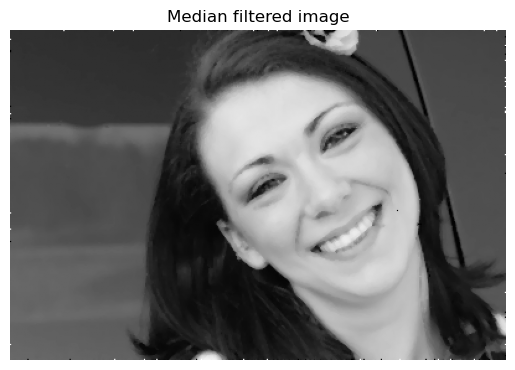

In [27]:
plt.imshow(median_filtered_img, cmap='gray', vmin=0, vmax=1)
plt.title('Median filtered image')
plt.axis('off')

**Exercise:** Use code above to write a function `simple_mean_filter` that applies the mean filter to non-edge pixels using a `3` by `3` grid.

**Exercise:** Modify the `simple_mean_filter` function to write a `simple_median_filter` that instead applies the median filter.

**Note**: We could combine these two functions into a single `simple_filter` function that takes in a noisy image array (`noisy_img`) along with some function (`filter_func`) that will be applied to each grid.

The `filter_func` input should be a function that takes in an 2D array and returns a float (e.g. `np.mean` or `np.median`).

In [ ]:
def simple_filter(noisy_img, filter_func=np.median):
    ...
    

Let's apply these filters to the `noisy_img` array and compare them. We can create a `2` by `2` grid of subplots that show the original image, the noisy version, and each filtered version. How do these filters perform?

### Dealing with edge pixels

With the simple filters written above, we ignored filtering pixels along the edge of the image. Let's try to deal with them now.

The [project page](https://jllottes.github.io/Projects/image_denoising/image_denoising.html#edge-pixels) discusses adding extra rows/columns to our array so that we are able to construct a `3` by `3` grid centered at all pixels of our original image.

If we are using `3` by `3` grids, we need to add one extra row/column on all sides. Our strategy then is to:
 - Create an array `padded_img` that has two additional rows and two additional columns than the `noisy_img` array;
 - Place the contents of the `noisy_img` array into a slice of the `padded_img` array that skips the first and last rows and first and last columns;
 - Apply the the mean/median filter to each of the non-edge pixels of the `padded_img` (which corresponds to applying the filter to every pixel of the `noisy_img` array).

**Note**: We have added black border to the `padded_img` (since we used `np.zeros`), which propogates into the `filtered_img` when we take any mean that includes padded pixels. We could instead add a white border (by using `np.ones`), but that's not any better. We could split the difference by using `np.ones(...)/2` to use a gray border. For the project, it might be a good idea to think of other ways that one could deal with filtering pixels along the edges.

Let's try to turn the sample code above into some functions that we can use more broadly.

**Exercise:** Write a function `get_padded_img(img, pad)` that takes in a 2D array `img` and returns a padded array that adds `pad` rows at the top, bottom, left, and right of the array.

**Exercise:** Write a function `edge_filter` that takes in a noisy image array and applies the mean/median filter to every pixel (including edges) using a `3` by `3` grid.

### Grid size

So far, we've been applying the mean/median filters using specifically a `3` by `3` grid centered on each pixel. What if we wan to use grids of different sizes, say `s=3`, `s=5`, `s=7`,...?

Let's think through how we would change our code to treat `5` by `5` grids. For now, let's again ignore the filtering of edge pixels.

What about `7` by `7` grids?

**Exercise:** Modify the examples above to take in a parameter `s`, which is an odd integer, and apply the mean/median filter using an `s` by `s` grid. You can skip filtering any rows/columns along the edge as necessary.

**Exercise:** Combine the two discussions (dealing with different grid sizes and dealing with edge pixels) to write functions `mean_filter(img, s)` and `median_filter(img,s)` that apply the mean/median filters to an input 2D array `img` using `s` by `s` grids, including all edge pixels.